## Decision Trees and Sparse

### Working with categories

Notice that with decision trees, there are two different ways to handle categorical data.

In [259]:
import pandas as pd
df = pd.read_csv('./customer_sparse.csv', index_col=0)

In [260]:
df

,under_thirty,borough,education_level,customer
0,Yes,Manhattan,high school,0
1,Yes,Brooklyn,college grad,0
2,No,Brooklyn,high school,1
3,No,Queens,some college,1
4,No,Queens,high school,1
5,No,Manhattan,law school,0
6,No,Queens,mba,0
7,Yes,Brooklyn,graduate school,0


The first way is to simply translate each corresponding code into a number.  We can do this by assigning each category value a separate number.

Now if we translate the appropriate columns into type category, then we can lean on pandas to do this for us.

In [234]:
df_categories = dropped_df.loc[:, 'under_thirty':'education_level'].astype('category')

In [235]:
df_without_cats = df.drop(columns = df_categories.columns)
df_cats = df_without_cats.merge(df_categories, left_index=True, right_index=True)


In [236]:
y = df.customer

In [237]:
X = df_cats.select_dtypes(include = ['category']).apply(lambda x: x.cat.codes)

### The ideal coercion

In [243]:
ordered_edu = df_cats.education_level.cat.set_categories(['high school', 'some college', 'college grad', 'law school', 'mba', 'graduate school'])
ordered_edu

0        high school
1       college grad
2        high school
3       some college
4        high school
5         law school
6                mba
7    graduate school
Name: education_level, dtype: category
Categories (6, object): [high school, some college, college grad, law school, mba, graduate school]

In [255]:
X_ordered = X.copy()
X_ordered.loc[:, 'education_level'] = ordered_edu.cat.codes

In [256]:
X_ordered

,under_thirty,borough,education_level
0,1,1,0
1,1,0,2
2,0,0,0
3,0,2,1
4,0,2,0
5,0,1,3
6,0,2,4
7,1,0,5


In [246]:
dtc_2 = DecisionTreeClassifier()
dtc_2.fit(X_ordered, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

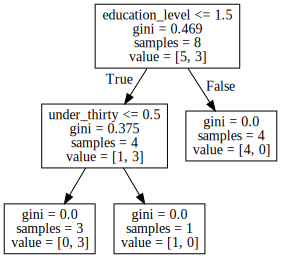

In [247]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_2 = Source(tree.export_graphviz(dtc_2, out_file=None,
                                feature_names=X_ordered.columns))

graph_2

### Doing Worse

In [238]:
dtc_1 = DecisionTreeClassifier()
dtc_1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

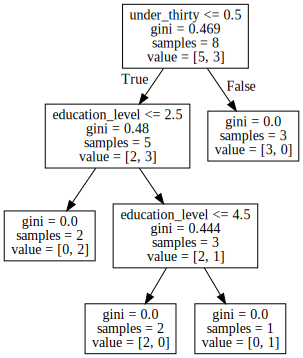

In [239]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(dtc_1, out_file=None,
                                feature_names=X.columns))

graph_1

In [240]:
df_cats.education_level.cat.categories

Index(['college grad', 'graduate school', 'high school', 'law school', 'mba',
       'some college'],
      dtype='object')

### One hot encoding

The other way to work with the data is to split the data apart into multiple columns with one hot encoding.

In [248]:
df_sparse = dropped_df.copy()

In [249]:
df_sparse

,under_thirty,borough,education_level,customer
0,Yes,Manhattan,high school,0
1,Yes,Brooklyn,college grad,0
2,No,Brooklyn,high school,1
3,No,Queens,some college,1
4,No,Queens,high school,1
5,No,Manhattan,law school,0
6,No,Queens,mba,0
7,Yes,Brooklyn,graduate school,0


In [250]:
df_sparse_cats = df_sparse.select_dtypes(include='object').astype('category')

In [251]:
sparsed_dummied = pd.get_dummies(df_sparse_cats)
sparsed_dummied

,under_thirty_No,under_thirty_Yes,borough_Brooklyn,borough_Manhattan,borough_Queens,education_level_college grad,education_level_graduate school,education_level_high school,education_level_law school,education_level_mba,education_level_some college
0,0,1,0,1,0,0,0,1,0,0,0
1,0,1,1,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0,0
5,1,0,0,1,0,0,0,0,1,0,0
6,1,0,0,0,1,0,0,0,0,1,0
7,0,1,1,0,0,0,1,0,0,0,0


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtc = DecisionTreeClassifier()

In [252]:
dtc.fit(sparsed_dummied, df.customer)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [253]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(dtc, out_file=None,
                                feature_names=sparsed_dummied.columns))


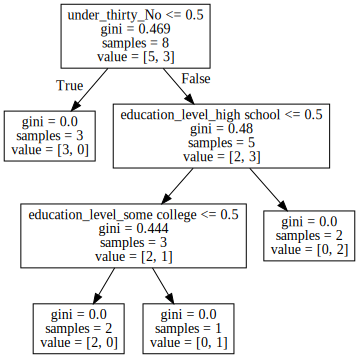

In [254]:
graph_1

### Resources

[Decision Trees and Sparse](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)